# 导向滤波

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

In [3]:
src = cv2.imread('../datas/f2.jpg')
rgb = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)

In [6]:
def guide_filter(src,r,eps=1.0e-5):
    srcf = src.astype(np.float32)
    srcclonef = srcf.copy()
    rows,cols = src.shape[0],src.shape[1]
    # 计算均值
    boxresult = cv2.boxFilter(np.ones((rows,cols),dtype=srcf.dtype),-1,(r,r))
    # 生成导向均值
    mean_I = cv2.boxFilter(srcf,-1,(r,r))
    mean_P = cv2.boxFilter(srcclonef,-1,(r,r))
    # 生成互相关均值
    mean_IP = cv2.boxFilter(srcf * srcclonef,-1,(r,r))
    conv_IP = mean_IP - mean_I * mean_P
    # 生成自相关均值
    mean_II = cv2.boxFilter(srcf * srcf,-1,(r,r))
    
    # 计算相关系数
    var_i = mean_II - mean_I * mean_I
    var_ip = mean_IP - mean_I * mean_P
    
    # 计算参数系数
    a = conv_IP / (var_i + eps)
    b = mean_P - a * mean_I
    
    # 计算系数均值
    mean_a = cv2.boxFilter(a,-1,(r,r))
    mean_a = mean_a / (boxresult+eps)
    mean_b = cv2.boxFilter(b,-1,(r,r))
    mean_b = mean_b / (boxresult + eps)
    result = mean_a * srcf + mean_b
    return result

Text(0.5,1,'导向滤波')

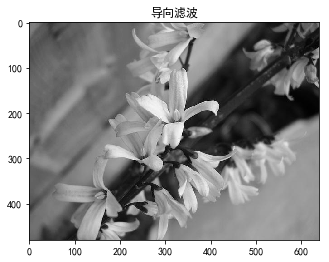

In [7]:
dst = guide_filter(gray,5)
plt.imshow(dst,'gray')
plt.title(u'导向滤波')